In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://www.kaggle.com/divyansh22/flight-delay-prediction
PATH_FLIGHTS = 'flights/Jan_2019_ontime.csv'


In [3]:
flights = pd.read_csv(PATH_FLIGHTS)

In [4]:
flights.head()

DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID  \
0             1            2                9E                  20363   
1             1            2                9E                  20363   
2             1            2                9E                  20363   
3             1            2                9E                  20363   
4             1            2                9E                  20363   

  OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
0         9E   N8688C               3280              11953   
1         9E   N348PQ               3281              13487   
2         9E   N8896A               3282              11433   
3         9E   N8886A               3283              15249   
4         9E   N8974C               3284              10397   

   ORIGIN_AIRPORT_SEQ_ID ORIGIN  ...  DEST  DEP_TIME DEP_DEL15  DEP_TIME_BLK  \
0                1195302    GNV  ...   ATL     601.0       0.0     0600-0659   
1                1348702    MSP  ...   CVG    1359.0       0.0     1400-1459   
2                1143302    DTW  ...   CVG    1215.0       0.0     1200-1259   
3                1524906    TLH  ...   ATL    1521.0       0.0     1500-1559   
4                1039707    ATL  ...   FSM    1847.0       0.0     1900-1959   

   ARR_TIME ARR_DEL15  CANCELLED  DIVERTED  DISTANCE  Unnamed: 21  
0     722.0       0.0        0.0       0.0     300.0          NaN  
1    1633.0       0.0        0.0       0.0     596.0          NaN  
2    1329.0       0.0        0.0       0.0     229.0          NaN  
3    1625.0       0.0        0.0       0.0     223.0          NaN  
4    1940.0       0.0        0.0       0.0     579.0          NaN  

[5 rows x 22 columns]

In [6]:
for i in flights.columns:
    print(i, '---->', len(flights[i].unique()))

DAY_OF_MONTH ----> 31
DAY_OF_WEEK ----> 7
OP_UNIQUE_CARRIER ----> 17
OP_CARRIER_AIRLINE_ID ----> 17
OP_CARRIER ----> 17
TAIL_NUM ----> 5447
OP_CARRIER_FL_NUM ----> 6839
ORIGIN_AIRPORT_ID ----> 346
ORIGIN_AIRPORT_SEQ_ID ----> 346
ORIGIN ----> 346
DEST_AIRPORT_ID ----> 346
DEST_AIRPORT_SEQ_ID ----> 346
DEST ----> 346
DEP_TIME ----> 1439
DEP_DEL15 ----> 3
DEP_TIME_BLK ----> 19
ARR_TIME ----> 1441
ARR_DEL15 ----> 3
CANCELLED ----> 2
DIVERTED ----> 2
DISTANCE ----> 1451
Unnamed: 21 ----> 1


In [11]:
cols = ['DAY_OF_WEEK', 'OP_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME_BLK', 'DEP_DEL15',
        'ARR_TIME', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'DISTANCE']

In [12]:
data = flights[cols]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DAY_OF_WEEK   583985 non-null  int64  
 1   OP_CARRIER    583985 non-null  object 
 2   ORIGIN        583985 non-null  object 
 3   DEST          583985 non-null  object 
 4   DEP_TIME_BLK  583985 non-null  object 
 5   DEP_DEL15     567630 non-null  float64
 6   ARR_TIME      566924 non-null  float64
 7   ARR_DEL15     565963 non-null  float64
 8   CANCELLED     583985 non-null  float64
 9   DIVERTED      583985 non-null  float64
 10  DISTANCE      583985 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 49.0+ MB


In [18]:
data['ARR_DEL15'].value_counts()

0.0    460741
1.0    105222
Name: ARR_DEL15, dtype: int64

In [21]:
cols_delay = ['DAY_OF_WEEK', 'OP_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME_BLK', 'DISTANCE', 'ARR_DEL15']

In [23]:
data = data[cols_delay]

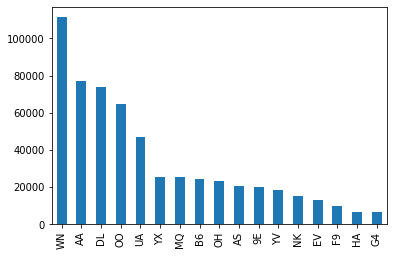

In [25]:
data['OP_CARRIER'].value_counts().plot.bar()

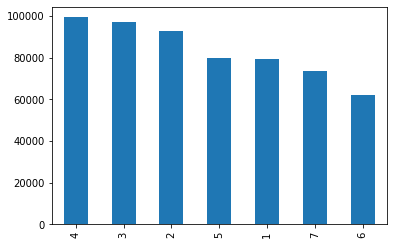

In [26]:
data['DAY_OF_WEEK'].value_counts().plot.bar()

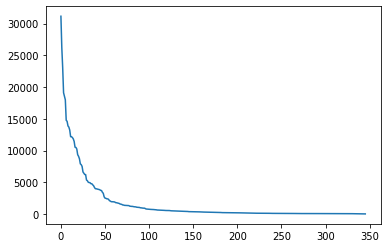

In [36]:
plt.plot(data['ORIGIN'].value_counts().values)

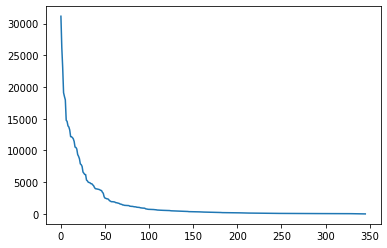

In [37]:
plt.plot(data['DEST'].value_counts().values)

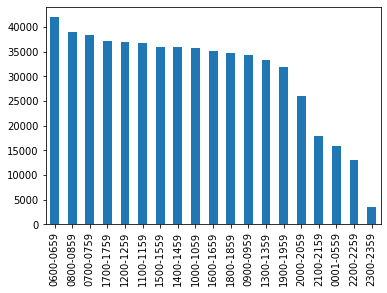

In [40]:
data['DEP_TIME_BLK'].value_counts().plot.bar()

(array([2.33920e+05, 1.98967e+05, 8.36440e+04, 3.40210e+04, 2.27790e+04,
        9.69400e+03, 2.54000e+02, 3.86000e+02, 1.12000e+02, 2.08000e+02]),
 array([  31. ,  526.2, 1021.4, 1516.6, 2011.8, 2507. , 3002.2, 3497.4,
        3992.6, 4487.8, 4983. ]),
 <a list of 10 Patch objects>)

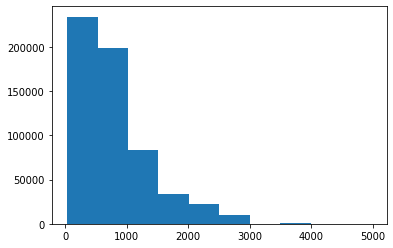

In [43]:
plt.hist(data['DISTANCE'].values)

In [44]:
data.isna().sum()*100 / data.shape[0]

DAY_OF_WEEK     0.000000
OP_CARRIER      0.000000
ORIGIN          0.000000
DEST            0.000000
DEP_TIME_BLK    0.000000
DISTANCE        0.000000
ARR_DEL15       3.086038
dtype: float64

In [46]:
data = data.dropna()

In [53]:
estados_muchos_vuelos = data['ORIGIN'].value_counts()[data['ORIGIN'].value_counts() > 3000].index

In [57]:
data['ORIGIN'] = data['ORIGIN'].map(lambda x: x if x in estados_muchos_vuelos else 'OTHER')
data['DEST'] = data['DEST'].map(lambda x: x if x in estados_muchos_vuelos else 'OTHER')

/Users/pablot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pablot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
X = data[['DAY_OF_WEEK', 'OP_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME_BLK', 'DISTANCE']]
y = data['ARR_DEL15']

In [63]:
X = pd.get_dummies(X)

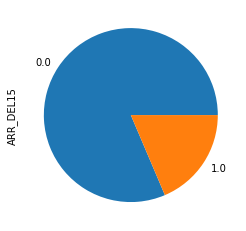

In [66]:
y.value_counts().plot.pie()

In [67]:
X

DAY_OF_WEEK  DISTANCE  OP_CARRIER_9E  OP_CARRIER_AA  OP_CARRIER_AS  \
0                 2     300.0              1              0              0   
1                 2     596.0              1              0              0   
2                 2     229.0              1              0              0   
3                 2     223.0              1              0              0   
4                 2     579.0              1              0              0   
...             ...       ...            ...            ...            ...   
583980            4    3801.0              0              0              0   
583981            4     129.0              0              0              0   
583982            4     129.0              0              0              0   
583983            4     129.0              0              0              0   
583984            4     129.0              0              0              0   

        OP_CARRIER_B6  OP_CARRIER_DL  OP_CARRIER_EV  OP_CARRIER_F9  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
583980              0              0              0              0   
583981              0              0              0              0   
583982              0              0              0              0   
583983              0              0              0              0   
583984              0              0              0              0   

        OP_CARRIER_G4  ...  DEP_TIME_BLK_1400-1459  DEP_TIME_BLK_1500-1559  \
0                   0  ...                       0                       0   
1                   0  ...                       1                       0   
2                   0  ...                       0                       0   
3                   0  ...                       0                       1   
4                   0  ...                       0                       0   
...               ...  ...                     ...                     ...   
583980              0  ...                       0                       0   
583981              0  ...                       0                       0   
583982              0  ...                       0                       0   
583983              0  ...                       0                       0   
583984              0  ...                       0                       0   

        DEP_TIME_BLK_1600-1659  DEP_TIME_BLK_1700-1759  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
...                        ...                     ...   
583980                       0                       0   
583981                       0                       0   
583982                       0                       0   
583983                       0                       0   
583984                       1                       0   

        DEP_TIME_BLK_1800-1859  DEP_TIME_BLK_1900-1959  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       1   
...                        ...                     ...   
583980                       0                       0   
583981                       0                       0   
583982                       0                       0   
583983          

In [69]:
25 * 565963 / 31

456421.77419354836

In [70]:
X_train = X.iloc[:456421]
X_test = X.iloc[456421:]

y_train = y.iloc[:456421]
y_test = y.iloc[456421:]

In [73]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(456421, 138)
(456421,)
(109542, 138)
(109542,)


In [109]:
from sklearn.ensemble import RandomForestClassifier
# XGBoost y LGBM

In [110]:
clf = RandomForestClassifier(n_estimators=200, class_weight={0: 1, 1:3})

In [111]:
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = clf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y_pred = y_pred[:, 1] > 0.3

In [ ]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

In [ ]:
y.sum()/len(y)

In [ ]:
y.value_counts() / len(y)